In [7]:
import math  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size']=30
matplotlib.rcParams['axes.linewidth'] = 4
matplotlib.rcParams['lines.linewidth'] = 4
plt.style.use( 'seaborn-v0_8-dark-palette')

In [2]:
boltzmann = 1.380649e-23 # units = J/K
temperature = 293 # Temperature in Kelvin 
dynamic_viscosity = 1e-3 # dynamic viscosity in kg/m.s
radius = 6e-9 # Radius in m 



diffusion_coefficient_translational = (boltzmann*temperature)/(6*math.pi * dynamic_viscosity * radius)
diffusion_coefficient_rotational = (boltzmann*temperature)/(8*math.pi * dynamic_viscosity * (radius**3))
rotational_relaxational_time = 1/diffusion_coefficient_rotational
print('Translational diffusion coefficient = ', diffusion_coefficient_translational,'m^2s^-1')
print('Translational diffusion coefficient = ', diffusion_coefficient_translational*1e+12,'µm^2s^-1')
print('Rotational diffusion coefficient = ', diffusion_coefficient_rotational, 's^-1')
print('Rotational relaxation time = ',rotational_relaxational_time,'seconds')

Translational diffusion coefficient =  3.576831895349472e-11 m^2s^-1
Translational diffusion coefficient =  35.76831895349472 µm^2s^-1
Rotational diffusion coefficient =  745173.31153114 s^-1
Rotational relaxation time =  1.3419696928560907e-06 seconds


Here I define the functions to calculate the rotational and translational diffusion coefficients according to the stokes-einstein equations: 

Translational diffusion: 

\\[D_t = \frac{k_{B}T}{6\pi \eta r}\\]


Rotational diffusion: 

\\[ D_r  = \frac{k_BT}{8\pi\eta r^3}\\]


Where:

     * kB- Boltzmann constant
	 * T - temperature
     * µ - Dynamic viscosity
	 * r  - particle radius
     

In [3]:
def get_translational_coefficient(bolzmann, temperature, dynamic_viscosity, radius):
    return (boltzmann*temperature)/(6*math.pi * dynamic_viscosity * radius)

def get_rotational_values(bolzmann, temperature, dynamic_viscosity, radius):
    diffusion_coefficient_rotational = (boltzmann*temperature)/(8*math.pi * dynamic_viscosity * (radius**3))
    rotational_relaxational_time = 1/diffusion_coefficient_rotational
    return diffusion_coefficient_rotational, rotational_relaxational_time

I also define a function to get the dynamic viscosity from the temperature, the values seen here are those from water according to a 3-parameter Andrade equation with the values given [on this page](https://www.engineersedge.com/physics/water__density_viscosity_specific_weight_13146.htm). 


In [4]:
def get_viscosity(T):
    A = 2.414e-5
    B = 247.8
    C=140
    #T=313.15

    u = A*10**(B/(T-C))
    return u

I can then create a plot to relate the expected diffusion rate (square root of diffusion coefficient) by particle radius and temperature as follows: 

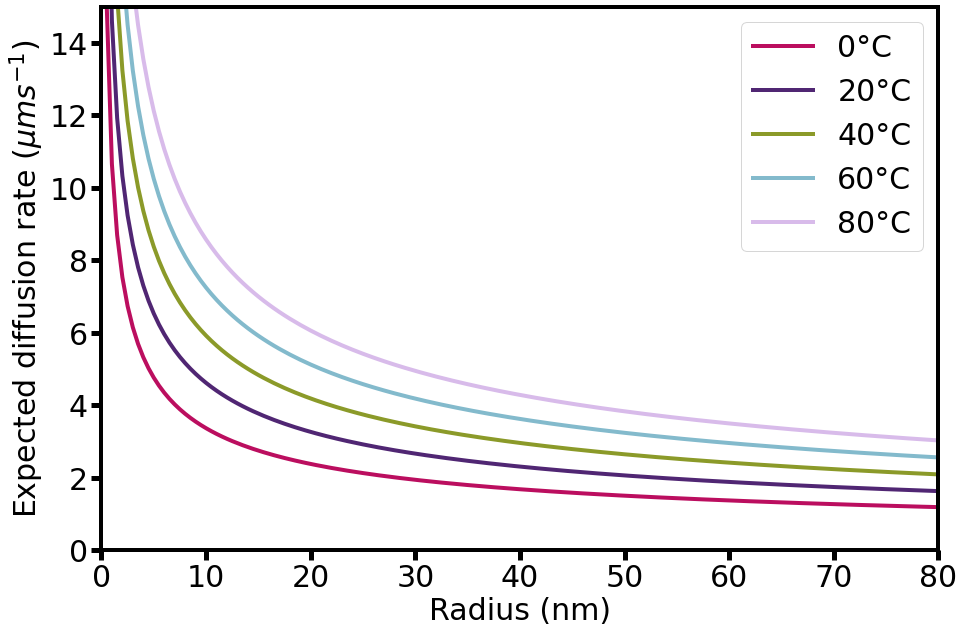

In [29]:
colors = ['#BB0E5F',   '#502673' , '#8B9A29','#83BACC',  '#D8BBEA']
import seaborn as sns
temperature = 293
plt.figure(figsize=(15,10))

plt.style.use( 'seaborn-v0_8-dark-palette')
plt.tick_params(length=10, width=5)

dynamic_viscosity =0.001

for i,temperature in enumerate([273, 293, 313, 333,353, ]): 
#for temperature in range(273, 323,10): 
    translational_list = []
    rotational_relaxation_list = []
    radii = []
    dynamic_viscosity = get_viscosity(temperature)
    for radius in [x*0.5*1e-9 for x in range(1,161)]:
        diffusion_coefficient = get_translational_coefficient(boltzmann, temperature, dynamic_viscosity,radius)*1e12
        translational_list.append(diffusion_coefficient**0.5)
        
        radii.append(radius*1e9)
    
    plt.plot(radii, translational_list, label='{}°C'.format(temperature-273), color=colors[i])

    
    
plt.xticks(range(0,81,10))
plt.xlim(0,80)
plt.ylim(0,15)
plt.xlabel('Radius (nm)')
plt.ylabel('Expected diffusion rate ($µms^{-1}$)')
plt.legend()
plt.show()

And for the rotational diffusion, I will use the relaxation time, which is the time for the orientation of the particles to be randomised as a measure for this. 

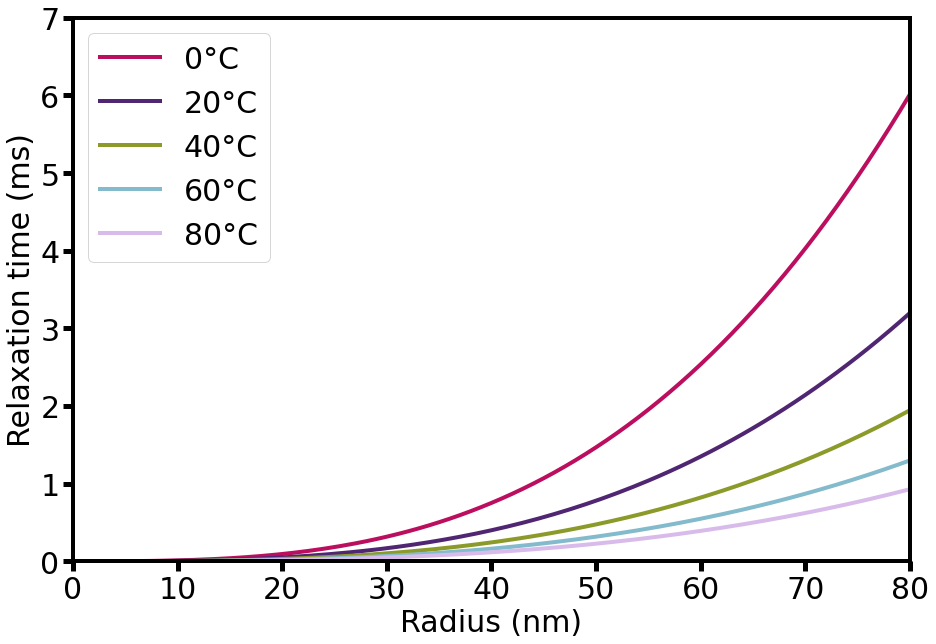

In [27]:
colors = ['#BB0E5F',   '#502673' , '#8B9A29','#83BACC',  '#D8BBEA']
import seaborn as sns
temperature = 293
plt.figure(figsize=(15,10))

plt.style.use( 'seaborn-v0_8-dark-palette')
plt.tick_params(length=10, width=5)


for i,temperature in enumerate([273, 293, 313, 333,353, ]): 
#for temperature in range(273, 323,10): 
    
    rotational_relaxation_list = []
    radii = []
    dynamic_viscosity = get_viscosity(temperature)
    for radius in [x*0.5*1e-9 for x in range(1,161)]:
        diffusion_coefficient, relaxation_time = get_rotational_values(boltzmann, temperature, dynamic_viscosity,radius)
        rotational_relaxation_list.append(relaxation_time*1e3)
        
        radii.append(radius*1e9)
    
    plt.plot(radii, rotational_relaxation_list, label='{}°C'.format(temperature-273), color=colors[i])

    
    
plt.xticks(range(0,81, 10))
plt.xlim(0,80)
plt.ylim(0,7)
plt.xlabel('Radius (nm)')
plt.ylabel('Relaxation time (ms)')
plt.legend()
plt.show()